# Sunset and prayer times over the year.

In [1]:
import pandas as pd
import datetime
import numpy as np

sunsetTimes = pd.read_csv("prayerTimes.csv").rename(columns=lambda x: x.strip())

def parseDate(year, month, day):
    return datetime.datetime.strptime(f'{year}-{month}-{day}','%Y-%m-%d')


def parseHour(x):
    dat = str(x)
    if(dat == " ** **" or pd.isna(dat)):
#         returnDate = datetime.datetime.strptime("1970,1,1 00 00", '%Y,%m,%d %H %M')#.time()
        return None;
    elif(dat[1:3]=="24"):
        dat = " 00" + dat[3:]
        returnDate = datetime.datetime.strptime("1970,1,2  " +dat, '%Y,%m,%d %H %M')#.time()
    else:
        returnDate =  datetime.datetime.strptime("1970,1,1  " +dat, '%Y,%m,%d %H %M')#.time()
    return returnDate
#     return returnDate#.strftime("%H:%M:')
#     return  datetime.datetime.strptime("1970,1,1 00 00", '%Y,%m,%d %H %M') - returnDate


#Format the date - initially in three columns: year, mth, d
dates = sunsetTimes.apply(lambda x: parseDate(x['Year'], x['mth'],x['d']), axis=1 );
# Remove the now unused date columns (but don't append the date until after we've transformed the times)
sunsetTimes = sunsetTimes.drop(["Year", "mth", "d"], axis=1)

# Transform the time-stamps to date-objects - need date objects so we can plot them.
sunsetTimes = sunsetTimes.applymap(lambda y: parseHour(y))

# Add the dates back to the dataFrame
sunsetTimes.insert(0, "date", dates)



sunsetTimes.rename(columns={'Twilight': 'Fajr', 
                            'Transit': 'Duhr', 
                            'Shadow 1': 'Asr', 
                            'Shadow 2': 'Asr 2',
                            'Twilight.1': 'Isha'}, 
                             inplace=True)

# Debug: Filter to find the empty times (they're between may start and July End)
# sunsetTimes[pd.isna(sunsetTimes.Isha)]
# mayStart = datetime.datetime.strptime("2019-05-25", '%Y-%m-%d');
# julyEnd =datetime.datetime.strptime("2019-07-17", '%Y-%m-%d');
# sunsetTimes[ (mayStart < sunsetTimes.date) & (sunsetTimes.date <  julyEnd) ]

# Fill the empty times with the last previous time
sunsetTimes = sunsetTimes.fillna(method='ffill')


sunsetTimes.head()


,date,Fajr,Sunrise,Duhr,Asr,Asr 2,Sunset,Isha
0,2019-01-01,1970-01-01 06:06:00,1970-01-01 08:06:00,1970-01-01 12:04:00,1970-01-01 13:46:00,1970-01-01 14:16:00,1970-01-01 16:02:00,1970-01-01 18:02:00
1,2019-01-02,1970-01-01 06:06:00,1970-01-01 08:06:00,1970-01-01 12:05:00,1970-01-01 13:47:00,1970-01-01 14:17:00,1970-01-01 16:03:00,1970-01-01 18:03:00
2,2019-01-03,1970-01-01 06:06:00,1970-01-01 08:06:00,1970-01-01 12:05:00,1970-01-01 13:48:00,1970-01-01 14:19:00,1970-01-01 16:04:00,1970-01-01 18:04:00
3,2019-01-04,1970-01-01 06:06:00,1970-01-01 08:06:00,1970-01-01 12:05:00,1970-01-01 13:49:00,1970-01-01 14:20:00,1970-01-01 16:05:00,1970-01-01 18:05:00
4,2019-01-05,1970-01-01 06:06:00,1970-01-01 08:06:00,1970-01-01 12:06:00,1970-01-01 13:50:00,1970-01-01 14:21:00,1970-01-01 16:07:00,1970-01-01 18:06:00


## Plot with pandas.plt



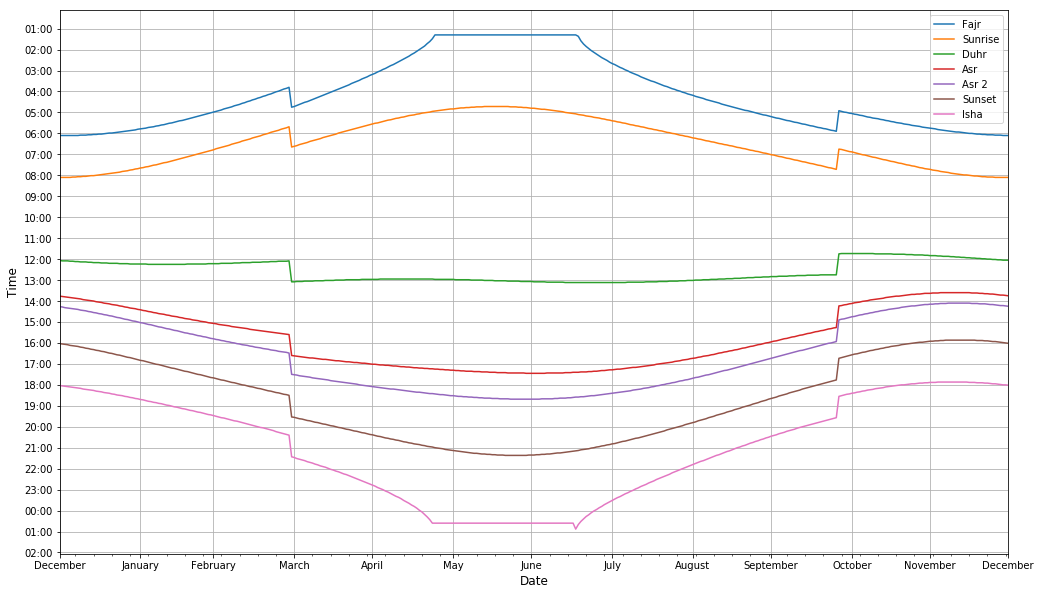

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# With just pd plot. (wrapper for matplotlib.pyplot)
plot = sunsetTimes.plot(x="date", figsize=(17,10))
plt.xlabel("Date", fontsize=12)

ax = plt.gca()
plt.ylabel("Time", fontsize=12)
time_fmt = mdates.DateFormatter('%H:%M')
ax.yaxis.set_major_formatter(time_fmt)
hours = mdates.HourLocator(interval = 1)
ax.yaxis.set_major_locator(hours)



plt.xlabel("Date", fontsize=12)
# plt.gcf().autofmt_xdate() #- slant the x axis
ax = plt.gca() 
month_fmt = mdates.DateFormatter('%B')
ax.xaxis.set_major_formatter(month_fmt)

ax.grid(True)

ax.invert_yaxis()

plt.show()


## Plot with matplotlib.pyplot



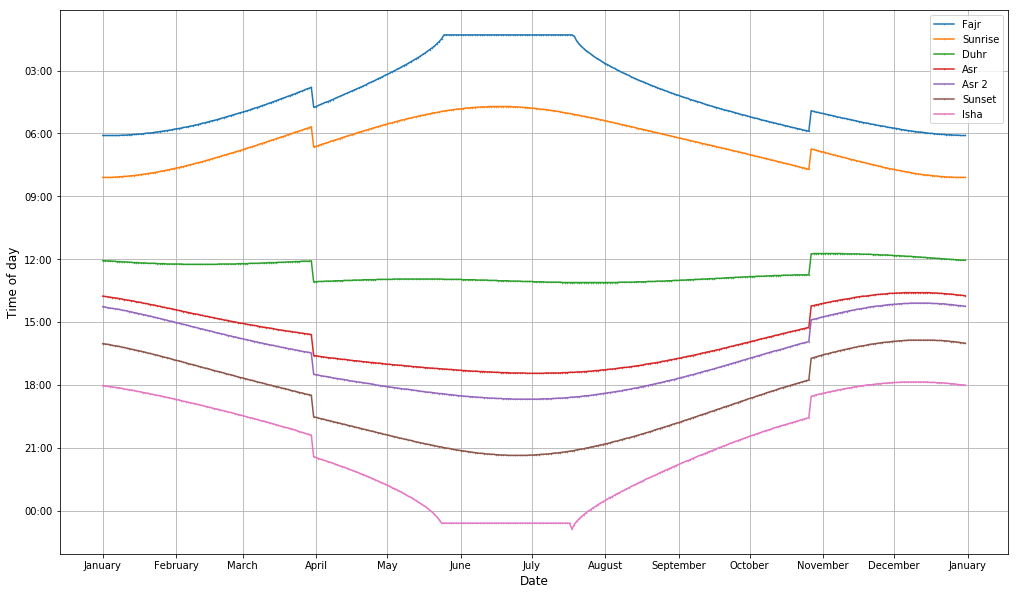

In [5]:
# %matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


ySeries = sunsetTimes.drop(["date"], axis=1)
labels = list(ySeries.keys())


# fig size - not sure why this one has to be first, before legend.
plt.figure(figsize=(17,10))


sunsetPlot = plt.plot_date( sunsetTimes['date'], 
                            ySeries, '-o',
                            xdate=True, ydate=True,
                           marker=".",
                           mew=1,
                           ms=1,
                           antialiased=True,
                           rasterized=True,
                          )



# x-axis labelling
monthsLocator = mdates.MonthLocator()  # every month
month_fmt = mdates.DateFormatter('%B')
plt.xlabel("Date", fontsize=12)
# plt.gcf().autofmt_xdate() #- slant the x axis
ax = plt.gca() 
ax.xaxis.set_major_locator(monthsLocator)
ax.xaxis.set_major_formatter(month_fmt)



# y-axis labelling
plt.ylabel("Time of day", fontsize=12)
time_fmt = mdates.DateFormatter('%H:%M')
ax.yaxis.set_major_formatter(time_fmt)

plt.gca().invert_yaxis()

ax.grid(True)



# legend
plt.legend(sunsetPlot, labels)




plt.show()